# See predicted function

In [1]:
import matlab.engine
from optimize import *
from skopt.acquisition import _gaussian_acquisition
loaded = load("./optims/scenario9/forest_0_400.opt")


Starting MATLAB engine...
-------------------------
Elapsed: 11.42 sec


DON'T FORGET:

Raw = Truth

Trans = Warped/normalized, used by surrogate

In [2]:
result = loaded
X = result.space.rvs(result.specs['args']['n_points'], random_state=0)

In [3]:
# True value
X[16]

[1.204685241203032, 134]

In [4]:
X_tran = result.space.transform(X)

In [6]:
# FAKE: alpha is less than 1
X_tran[16]

array([8.08735898e-02, 1.34000000e+02])

In [7]:
res_optimum(loaded)

([7.607750817404902, 37], 0.11264818867588439)

In [58]:
for dim in loaded.space:
    print(dim.bounds)
    print(type(dim))

(1, 10000)
<class 'skopt.space.space.Real'>
(2, 200)
<class 'skopt.space.space.Integer'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005BA20DD400>,
      dtype=object)

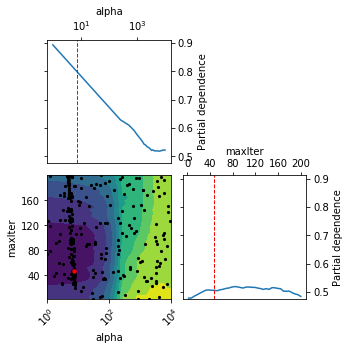

In [8]:
from skopt.plots import plot_objective

plot_objective(loaded)

In [19]:
# how the actual function works
surrogate = np.zeros((27, 41))
for i in range(27):
    maxIter = 10**(i/20.0+1)
    for j in range(41):
        alpha = 10**(j/20.0-1)
        surrogate[i][j] = loaded.models[-1].predict(loaded.space.transform([[alpha, maxIter]]))[0]

In [31]:
savemat('./figures/hyper_opt.mat', mdict={'surface':surrogate, 'x':loaded.x_iters, 'y':loaded.func_vals})